In [1]:
#Reloads the modules to update any changes
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [9]:
import ipas.collection_from_db.database as database
import ipas.visualizations.plotly_aggs
import plotly_aggs
import ipas
import numpy as np
import glob
import scipy.optimize as opt
import chart_studio
import chart_studio.plotly as py
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import plotly.graph_objs as go

USERNAME = 'vprzybylo'  # enter you're username
API_KEY = 'OMsNjlNJ5Vx9SwF5RGT6'  # enter you're api_key
chart_studio.tools.set_credentials_file(username=USERNAME, api_key=API_KEY)


## Read Database

In [5]:
orientation = 'rand'  # chose which orientation (rand or flat)
if orientation == 'rand':
    rand_orient = True      #randomly orient the seed crystal and new crystal: uses first random orientation
    files = glob.glob("/network/rit/lab/sulialab/share/IPAS/ipas/instance_files/createdb_iceagg_rand*")[:2]
else:
    rand_orient = False      #randomly orient the seed crystal and new crystal: uses first random orientation
    files =  glob.glob("/network/rit/lab/sulialab/share/IPAS/ipas/instance_files/createdb_iceagg_flat*")[:2]

In [6]:
%%time
db = database.Database(files)
db.read_database()
db.append_shape()
db.truncate_agg_r(5000)
db.append_agg_phi()
df = db.df  # get the dataframe (db is an instance of database.py module)

reading:  /network/rit/lab/sulialab/share/IPAS/ipas/instance_files/createdb_iceagg_rand_r500_1000
reading:  /network/rit/lab/sulialab/share/IPAS/ipas/instance_files/createdb_iceagg_rand_r1_5
CPU times: user 23.5 s, sys: 19.5 s, total: 43 s
Wall time: 1min 24s


In [7]:
df = df.reset_index(drop=True)
#df[df.ncrystals == 2].tail(30)
df[(df.mono_phi >=90) & (df.ncrystals == 2)].tail(30)

,level_0,index,ncrystals,points,a,b,c,cplx,phi2D,mono_phi,mono_r,shape,agg_r,agg_phi
1159584,1913130,1913130,2,"[[[-102.87989938432483, -100.20207445566325, -...",164.540676,118.286407,3.484820,0.882040,0.410579,100.0,5,oblate,45.524199,0.021179
1159613,1913159,1913159,2,"[[[22.866385852676874, -199.64099247009773, 18...",249.484703,61.625961,3.271488,0.855894,0.132885,100.0,5,prolate,13.873250,0.013113
1159642,1913188,1913188,2,"[[[-63.62822348409638, -108.30600266986428, 76...",150.336240,130.724661,18.535499,0.875890,0.669627,100.0,5,oblate,74.824511,0.123294
1159671,1913217,1913217,2,"[[[-3.25151588611746, -122.11700548677251, -7....",151.894773,123.951100,27.489040,0.906939,0.565014,100.0,5,oblate,85.917523,0.180974
1159700,1913246,1913246,2,"[[[-4.1581880510728695, -135.29889337617547, -...",168.364219,114.544626,2.568319,0.901386,0.379681,100.0,5,oblate,41.755741,0.015255
1159729,1913275,1913275,2,"[[[-44.60827942396699, -36.6802685526345, 140....",167.191749,135.420814,15.278641,0.841993,0.462210,100.0,5,oblate,75.307483,0.091384
1159758,1913304,1913304,2,"[[[-187.94332043952772, 40.02057398082179, 6.8...",227.896911,76.017952,5.848594,0.849064,0.169136,100.0,5,prolate,19.828070,0.025663
1159787,1913333,1913333,2,"[[[48.5252537179442, 153.6848821659671, 51.719...",205.976912,80.691127,8.993640,0.858512,0.086501,100.0,5,prolate,25.540528,0.043663
1159816,1913362,1913362,2,"[[[105.63017333954858, -36.35012237669374, -74...",171.364033,87.016123,17.304243,0.892515,0.444802,100.0,5,prolate,37.159936,0.100979
1159845,1913391,1913391,2,"[[[-37.584286292389564, 45.54573165597301, 175...",215.725286,96.502460,4.022419,0.872820,0.258581,100.0,5,prolate,15.169056,0.018646


## Generate Plot in Plotly (click on output URL)

In [10]:
index = 1159932 # which agg to plot
agg = df.iloc[index]

all_agg_data = []
for crystal_num in range(agg.ncrystals):  # index of monomer in agg
    agg_plt = plotly_aggs.PlotAgg(agg, crystal_num)
    agg_plt.prism_points()
    agg_plt.min_max_all_points()
    agg_plt.basal_points_bottom()
    agg_plt.basal_points_top()
    agg_plt.get_scatter_plot_data()
    # go.Scatter3d for each part of monomer for each monomer in agg
    all_agg_data.extend([agg_plt.trace_prism,
                        agg_plt.trace_basal_top,
                        agg_plt.trace_basal_bottom])

#apply to whole agg, not each individual monomer
xell, yell, zell, x, y, z = agg_plt.ellipsoid_surface()
agg_plt.scatter_ellipsoid(xell, yell, zell, x, y, z)
all_agg_data.append(agg_plt.ellipsoid_surface)
all_agg_data.append(agg_plt.ellipsoid_radius_b1)
all_agg_data.append(agg_plt.ellipsoid_radius_b2)
all_agg_data.append(agg_plt.ellipsoid_radius_r1)
all_agg_data.append(agg_plt.ellipsoid_radius_r2)
all_agg_data.append(agg_plt.ellipsoid_radius_g1)
agg_plt.camera()
agg_plt.layout()

fig = go.Figure(data=all_agg_data, layout=agg_plt.layout)
fig.update_layout(width=700, height=700)
py.iplot(fig)

In [114]:
index = 13111  # which agg to plot
agg = df.iloc[index]
agg_clus = ipas.cluster_calculations.ClusterCalculations(agg)

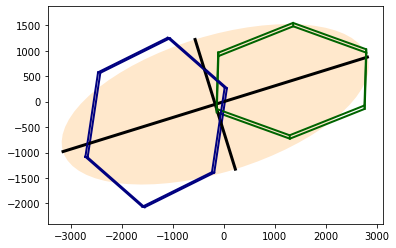

In [16]:
agg_clus.plot_ellipse([['x', 'y']])

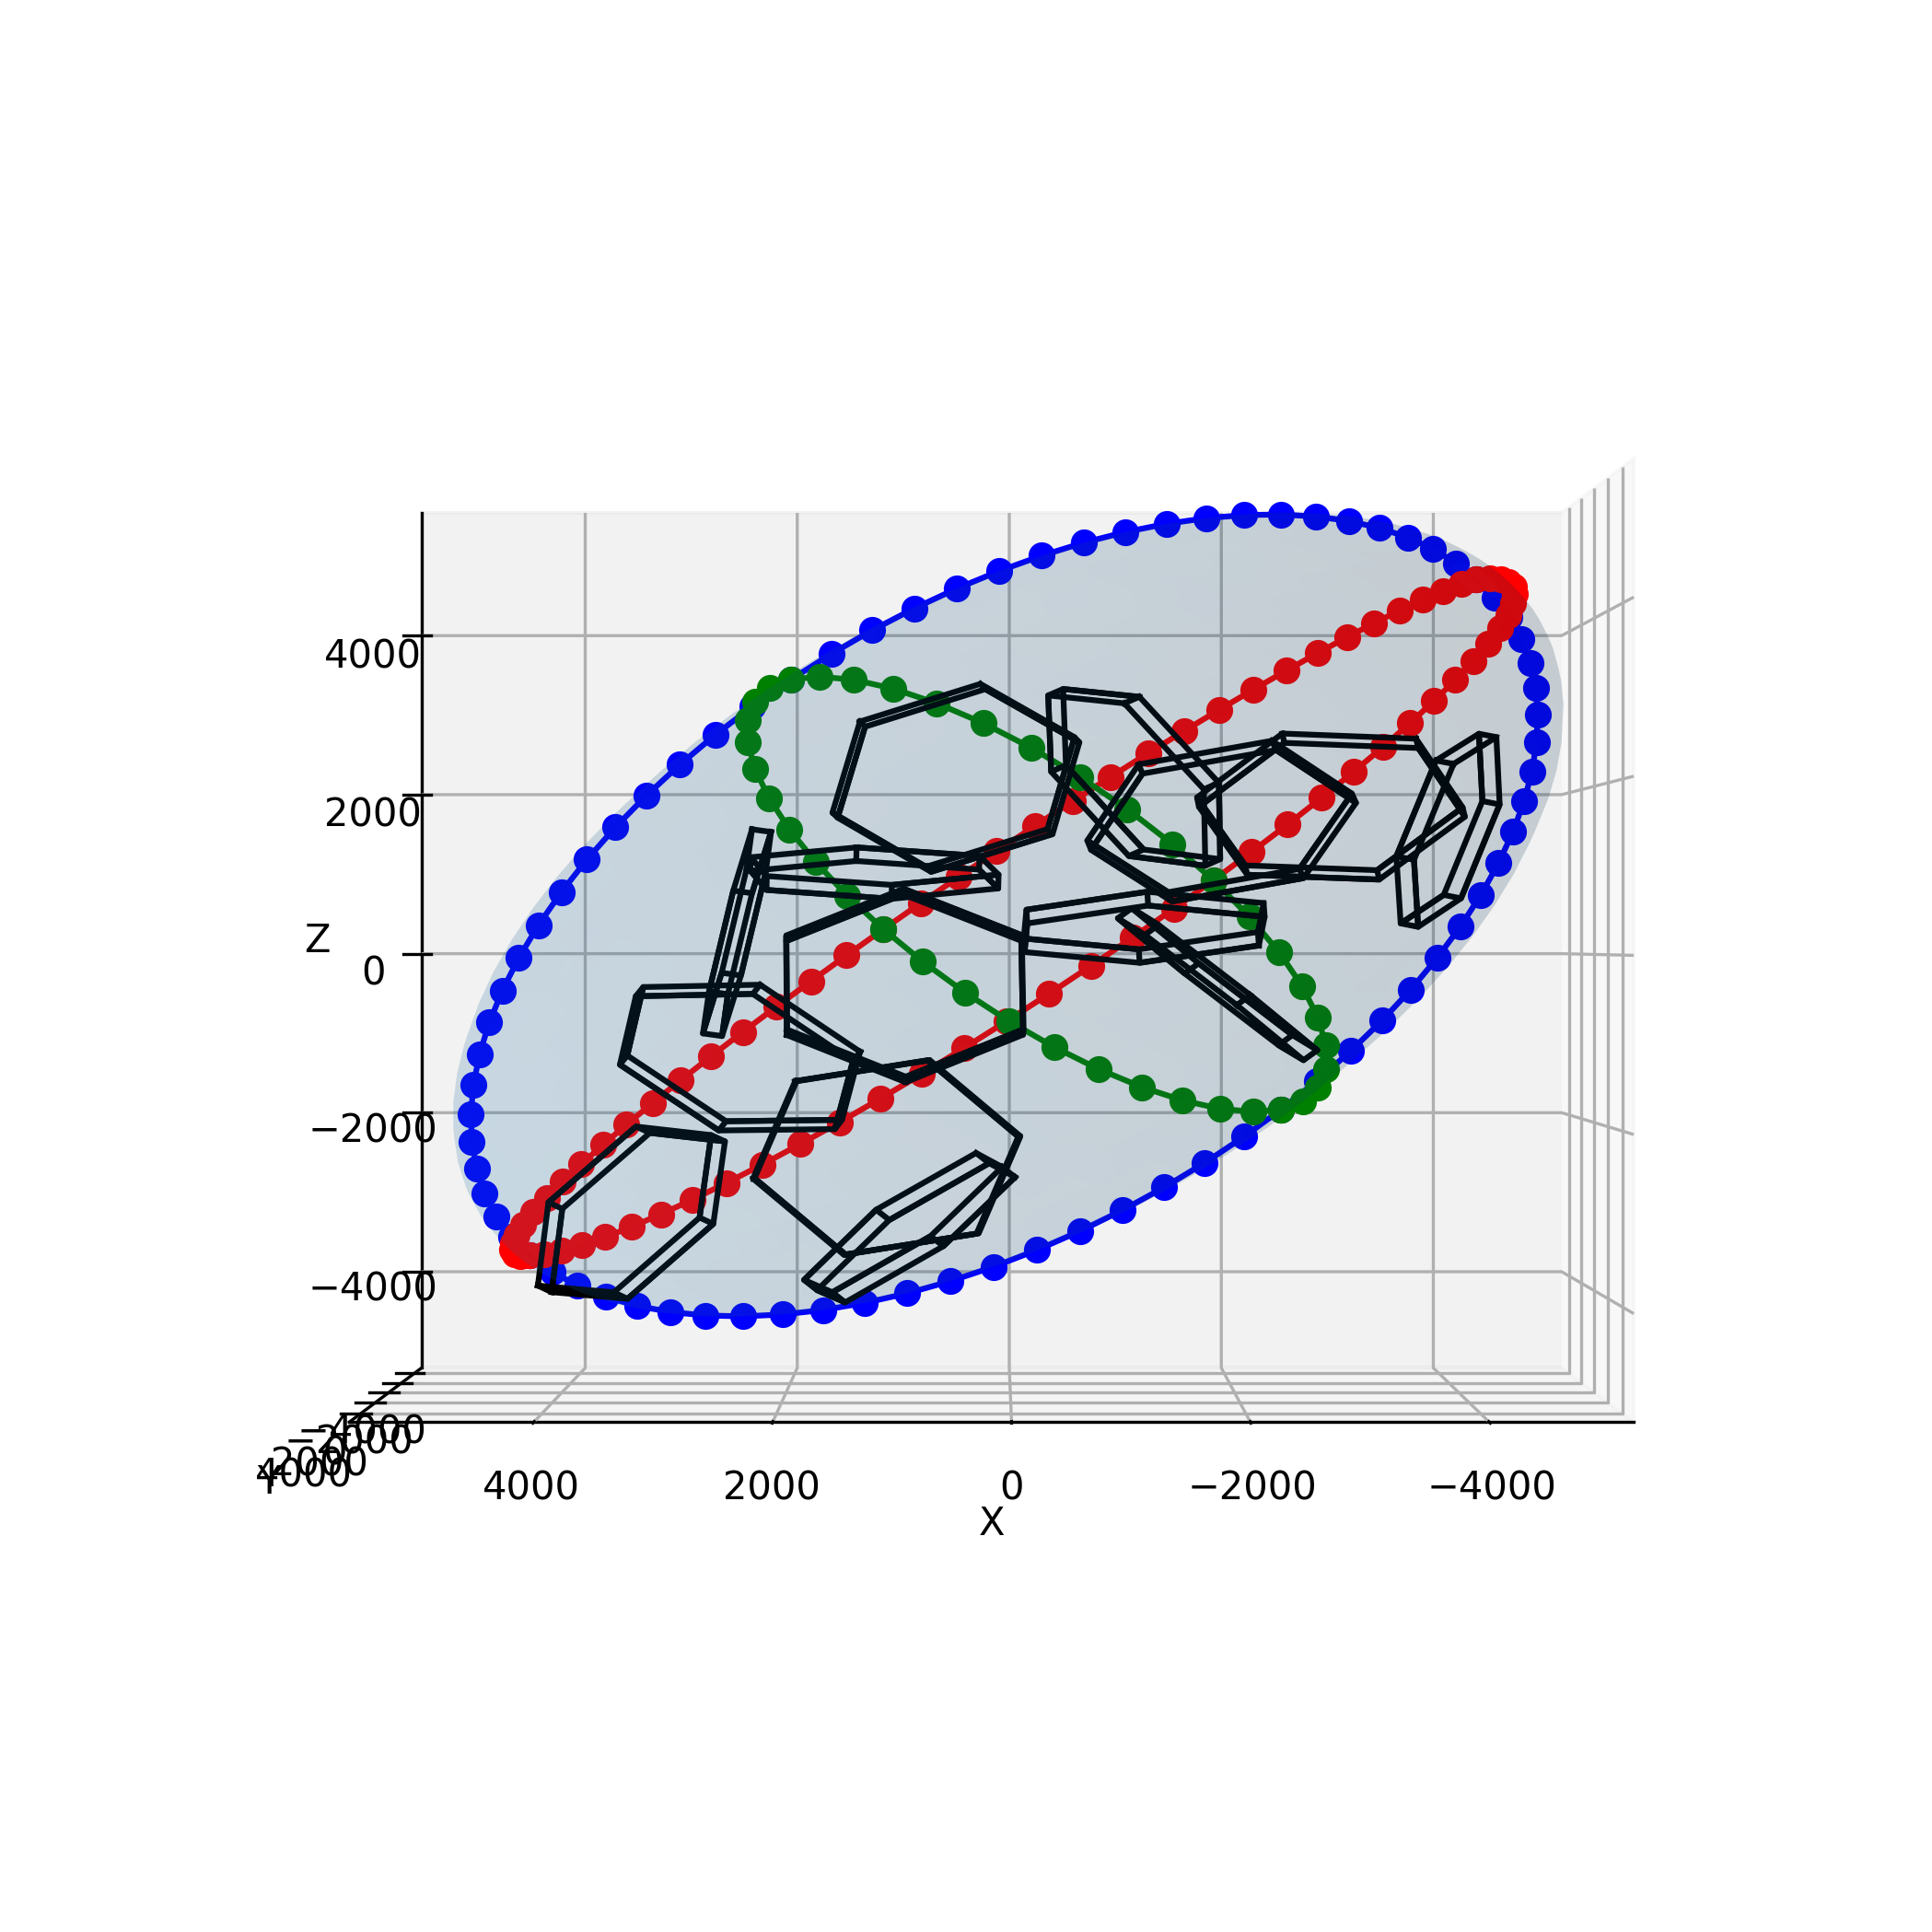

In [116]:
agg_clus.plot_ellipsoid_aggs([agg], view='x', circle=None, agg_agg=True)